In [2]:
import numpy as np 

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
import warnings

# Ensuring plots appear inline if using Jupyter Notebook
%matplotlib inline  

# Suppressing warnings
warnings.filterwarnings('ignore')

# READING THE DATA

In [17]:
import pandas as pd

# Try reading the file with 'ISO-8859-1' encoding
superstore_sales = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')




In [18]:
# Display the first few rows
superstore_sales.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2793,2794,CA-2011-154599,12-04-2011,17-04-2011,Standard Class,KN-16450,Kean Nguyen,Corporate,United States,Redondo Beach,...,90278,West,TEC-PH-10001557,Technology,Phones,Pyle PMP37LED,1075.088,14,0.2,94.0702
5153,5154,US-2011-121566,30-06-2011,06-07-2011,Standard Class,CS-11860,Cari Schnelling,Consumer,United States,New York City,...,10011,East,OFF-AR-10001026,Office Supplies,Art,"Sanford Uni-Blazer View Highlighters, Chisel T...",6.600,3,0.0,2.9040
8817,8818,CA-2012-144274,23-11-2012,25-11-2012,Second Class,PW-19240,Pierre Wener,Consumer,United States,Wilmington,...,19805,East,OFF-EN-10003286,Office Supplies,Envelopes,Staples,16.560,2,0.0,7.7832
5235,5236,CA-2013-111143,20-11-2013,23-11-2013,First Class,TT-21265,Tim Taslimi,Corporate,United States,Indianapolis,...,46203,Central,OFF-AP-10001947,Office Supplies,Appliances,Acco 6 Outlet Guardian Premium Plus Surge Supp...,54.960,3,0.0,15.9384
2919,2920,CA-2013-160129,24-11-2013,24-11-2013,Same Day,LS-17200,Luke Schmidt,Corporate,United States,Philadelphia,...,19140,East,FUR-FU-10002088,Furniture,Furnishings,Nu-Dell Float Frame 11 x 14 1/2,14.368,2,0.2,3.9512


# EXPLORATORY DATA

In [19]:
df = superstore_sales.copy()

In [20]:
df.shape

(9994, 21)

In [21]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [23]:
df[['Sales','Discount','Profit','Quantity']].describe()

,Sales,Discount,Profit,Quantity
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,0.156203,28.656896,3.789574
std,623.245101,0.206452,234.260108,2.225110
min,0.444000,0.000000,-6599.978000,1.000000
25%,17.280000,0.000000,1.728750,2.000000
50%,54.490000,0.200000,8.666500,3.000000
75%,209.940000,0.200000,29.364000,5.000000
max,22638.480000,0.800000,8399.976000,14.000000


# Drop unnecessary columns

In [24]:
df=df.drop('Row ID',axis=1)

In [25]:
df['Country'].value_counts()

Country
United States    9994
Name: count, dtype: int64

In [26]:
df=df.drop('Country',axis=1)

In [27]:
df.drop(['Order ID',         'Ship Date',          'Ship Mode',          'Customer ID',     
         'Customer Name',          'Postal Code',         'Product ID',          'Product Name'],      
        axis=1, inplace = True)

In [28]:
df.shape

(9994, 11)

# review the product categories available

In [30]:
category_counts = df['Category'].value_counts()
category_counts

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

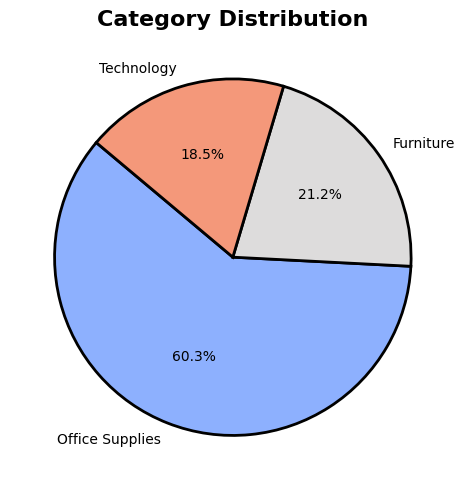

In [31]:
# Create a pie chart
fig, axs = plt.subplots(figsize=(5, 5))

axs.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('coolwarm', len(category_counts)),
    wedgeprops={'edgecolor': 'black', 'linewidth': 2}
)

# Set the title
axs.set_title('Category Distribution', fontsize=16, fontweight='bold')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

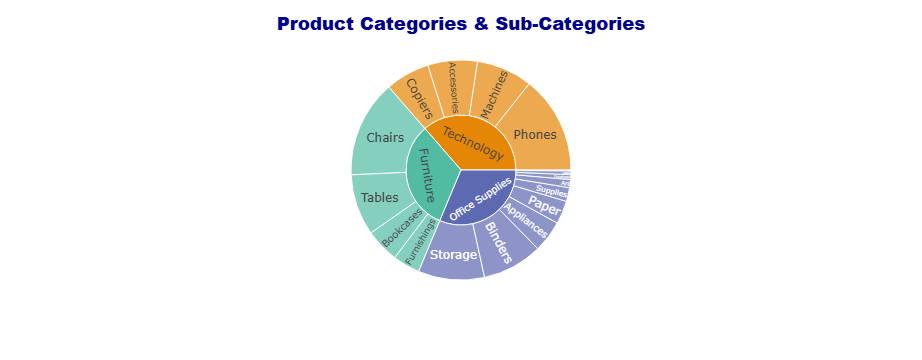

In [44]:
import plotly.express as px

# Create a Sunburst Chart
fig = px.sunburst(
    df,
    path=['Category', 'Sub-Category'], 
    values='Sales', 
    color='Category',  
    hover_data=['Sales', 'Quantity', 'Profit'],  
    color_discrete_sequence=px.colors.qualitative.Vivid  
)

# Customize layout for better visuals
fig.update_layout(
    height=600,  
    title_text='Product Categories & Sub-Categories', 
    title_x=0.5,  
    title_font=dict(size=18, color='darkblue', family='Arial Black'),
    paper_bgcolor='white'  
)

# Show the chart
fig.show()


# Above graphs indicates->Share of each category & sub-category in Sales->Which sub-category belongs to which category->Share of sub-category for each category(click on any category to get detailed view of each sub-category)

You may get a wrong view of how many products are soldtotal sales in pie plot

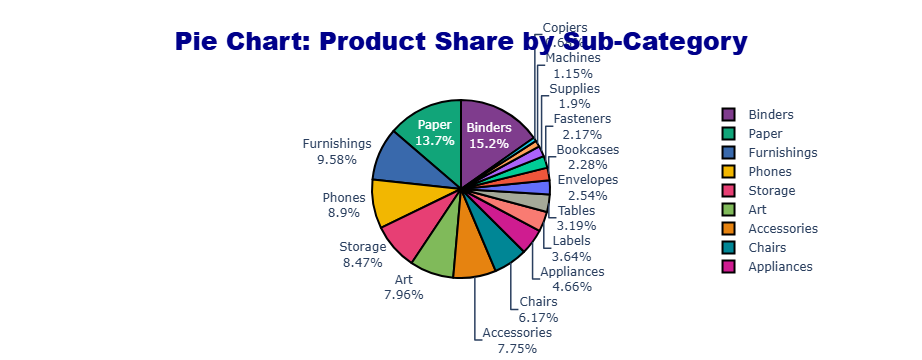

In [47]:
import plotly.graph_objects as go
from plotly.offline import iplot

# Create Pie Chart
fig = go.Figure(
    data=[go.Pie(
        labels=df['Sub-Category'].value_counts().index,  
        values=df['Sub-Category'].value_counts(),  
        textinfo='label+percent',  
        hoverinfo='label+percent', 
        marker=dict(
            colors=px.colors.qualitative.Bold, 
            line=dict(width=2, color='black')  
        )
    )]
)

# Layout Customization
fig.update_layout(
    title='Pie Chart: Product Share by Sub-Category',
    title_font=dict(size=25, color='darkblue', family='Arial Black'),
    title_x=0.5,  
    height=600,  
)

# Show the plot
iplot(fig)


# Review of sales and profits

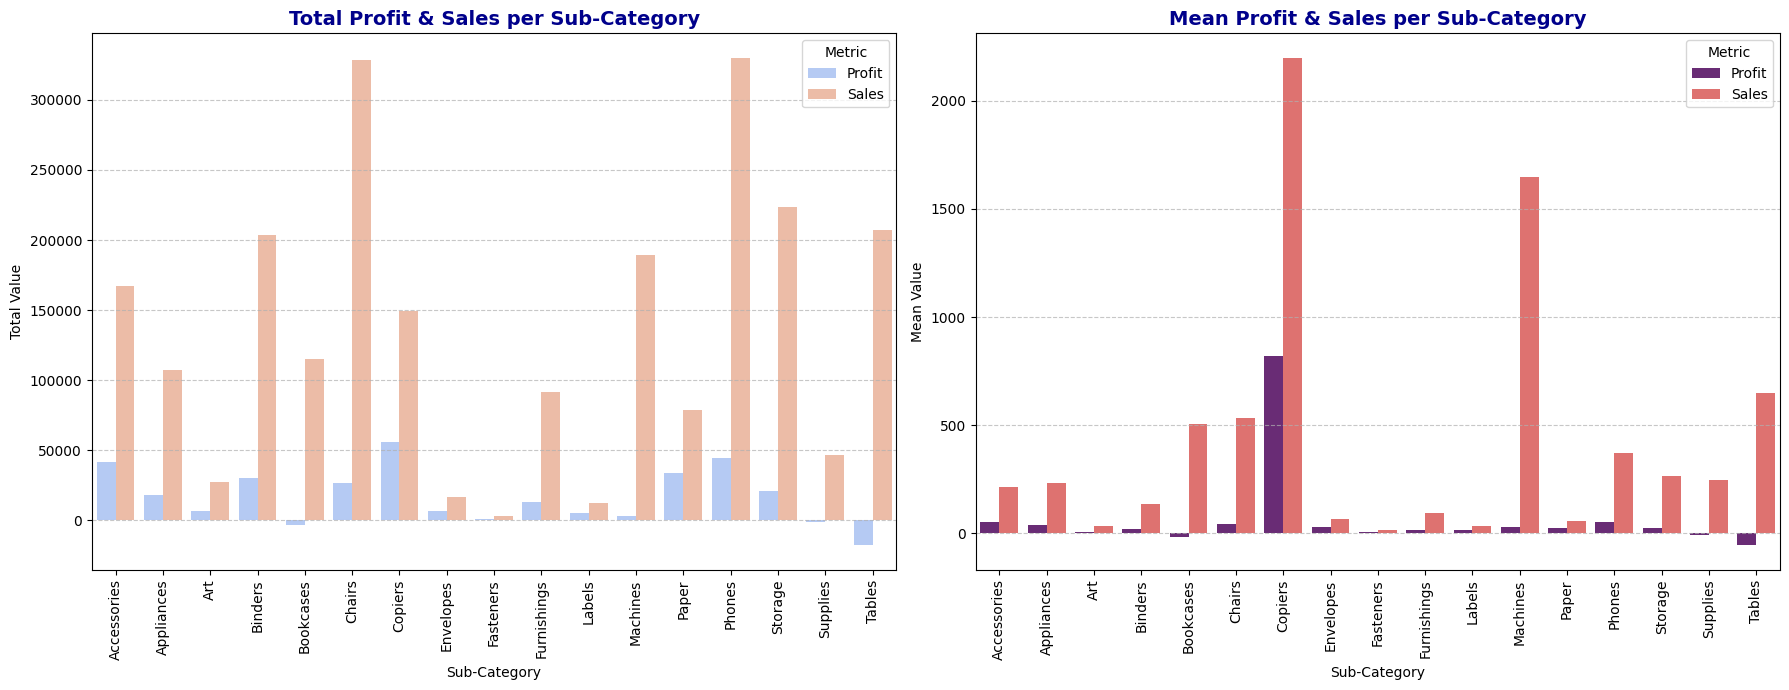

In [50]:

# Grouped Data
grouped_sum = df.groupby('Sub-Category')[['Profit', 'Sales']].sum().reset_index()
grouped_mean = df.groupby('Sub-Category')[['Profit', 'Sales']].mean().reset_index()

# Create Subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Total Profit & Sales per Sub-Category
sns.barplot(
    data=grouped_sum.melt(id_vars='Sub-Category', var_name='Metric', value_name='Value'),
    x='Sub-Category', y='Value', hue='Metric', ax=axes[0],
    palette='coolwarm' 
)
axes[0].set_title('Total Profit & Sales per Sub-Category', fontsize=14, fontweight='bold', color='darkblue')
axes[0].set_ylabel('Total Value')
axes[0].set_xlabel('Sub-Category')
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Mean Profit & Sales per Sub-Category
sns.barplot(
    data=grouped_mean.melt(id_vars='Sub-Category', var_name='Metric', value_name='Value'),
    x='Sub-Category', y='Value', hue='Metric', ax=axes[1],
    palette='magma'  
)
axes[1].set_title('Mean Profit & Sales per Sub-Category', fontsize=14, fontweight='bold', color='darkblue')
axes[1].set_ylabel('Mean Value')
axes[1].set_xlabel('Sub-Category')
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Layout Adjustments
plt.tight_layout()
plt.show()


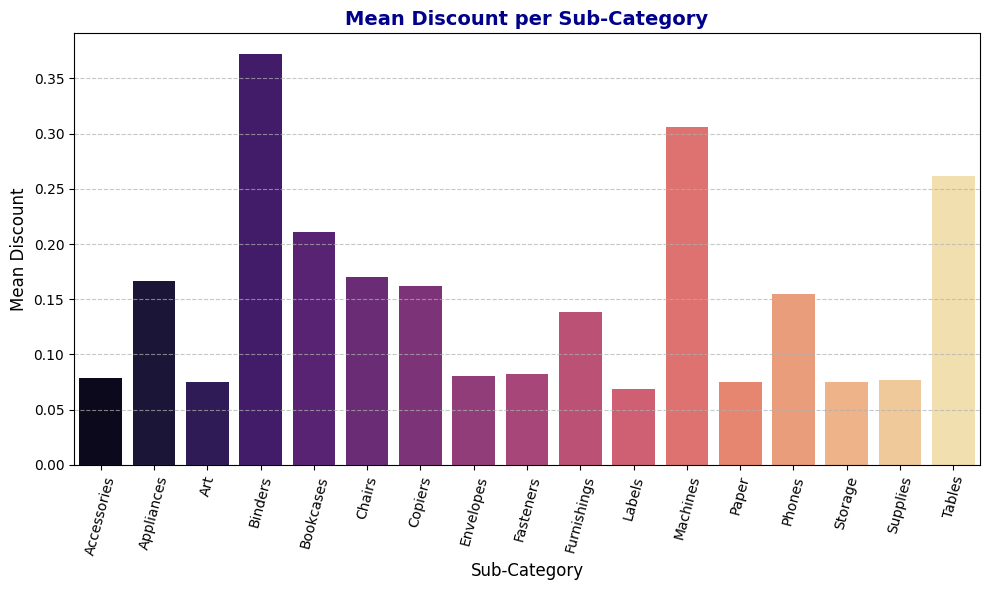

In [52]:

# Grouped Data for Mean Discount per Sub-Category
grouped_discount_mean = df.groupby('Sub-Category')['Discount'].mean().reset_index()

# Create Figure
fig, ax = plt.subplots(figsize=(10, 6))

# Barplot
sns.barplot(
    data=grouped_discount_mean, x='Sub-Category', y='Discount', 
    ax=ax, palette='magma' 
)

# Title & Labels
ax.set_title('Mean Discount per Sub-Category', fontsize=14, fontweight='bold', color='darkblue')
ax.set_ylabel('Mean Discount', fontsize=12)
ax.set_xlabel('Sub-Category', fontsize=12)

# Rotate X-axis labels for clarity
ax.tick_params(axis='x', rotation=75)

# Add Gridlines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show Plot
plt.tight_layout()
plt.show()


# The store's discount system has a problem
->Best-selling products can be sold with no discount or with a partial discount->Products that are causing damage to the store should be sold without discount->Products with limited sales and higher profitability should be sold at a higher discount to attract customers
review of the sales of different parts of the US

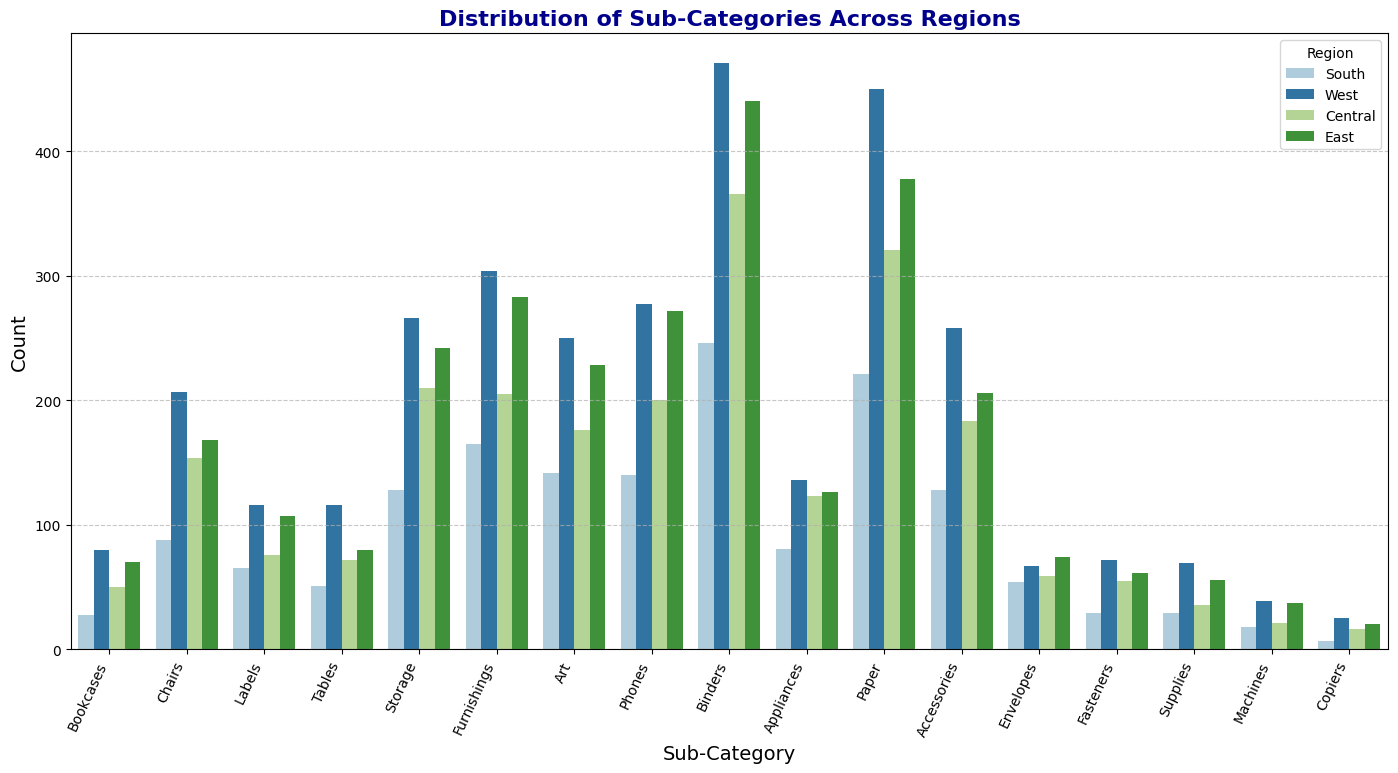

In [56]:
# Set Figure Size
plt.figure(figsize=(17, 8))

# Countplot with Improved Colors
sns.countplot(
    x="Sub-Category", hue="Region", data=df, 
    palette="Paired"  
)

# Title & Labels
plt.title("Distribution of Sub-Categories Across Regions", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Sub-Category", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate X-axis Labels
plt.xticks(rotation=65, ha='right')

# Gridlines for Better Readability
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Show the Plot
plt.show()


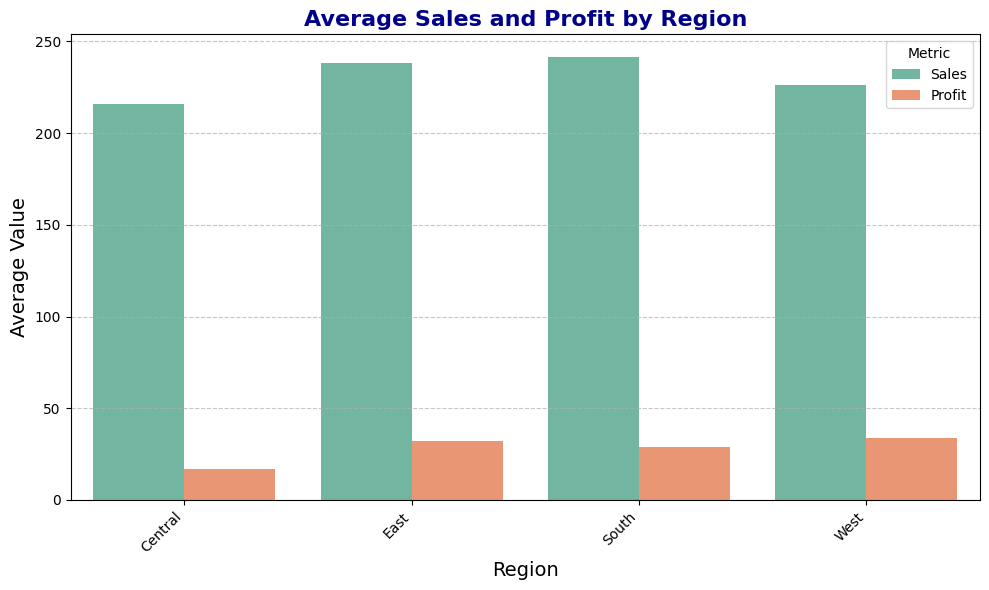

In [58]:

# Grouped Data (Average Sales & Profit by Region)
grouped_data = df.groupby('Region')[['Sales', 'Profit']].mean().reset_index()
melted_data = grouped_data.melt(id_vars='Region', var_name='Metric', value_name='Value')

# Set Figure Size
plt.figure(figsize=(10, 6))

# Barplot with Improved Colors
sns.barplot(
    data=melted_data, x='Region', y='Value', hue='Metric', 
    palette="Set2"  
)

# Title & Labels
plt.title("Average Sales and Profit by Region", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Region", fontsize=14)
plt.ylabel("Average Value", fontsize=14)

# Rotate X-axis Labels for Better Readability
plt.xticks(rotation=45, ha='right')

# Add Gridlines for Clearer Comparison
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Show the Plot
plt.tight_layout()
plt.show()


# People in the west and east are more inclined to buy from department superstores than those in the south and center.
People in the south have more expensive purchases.

with more details

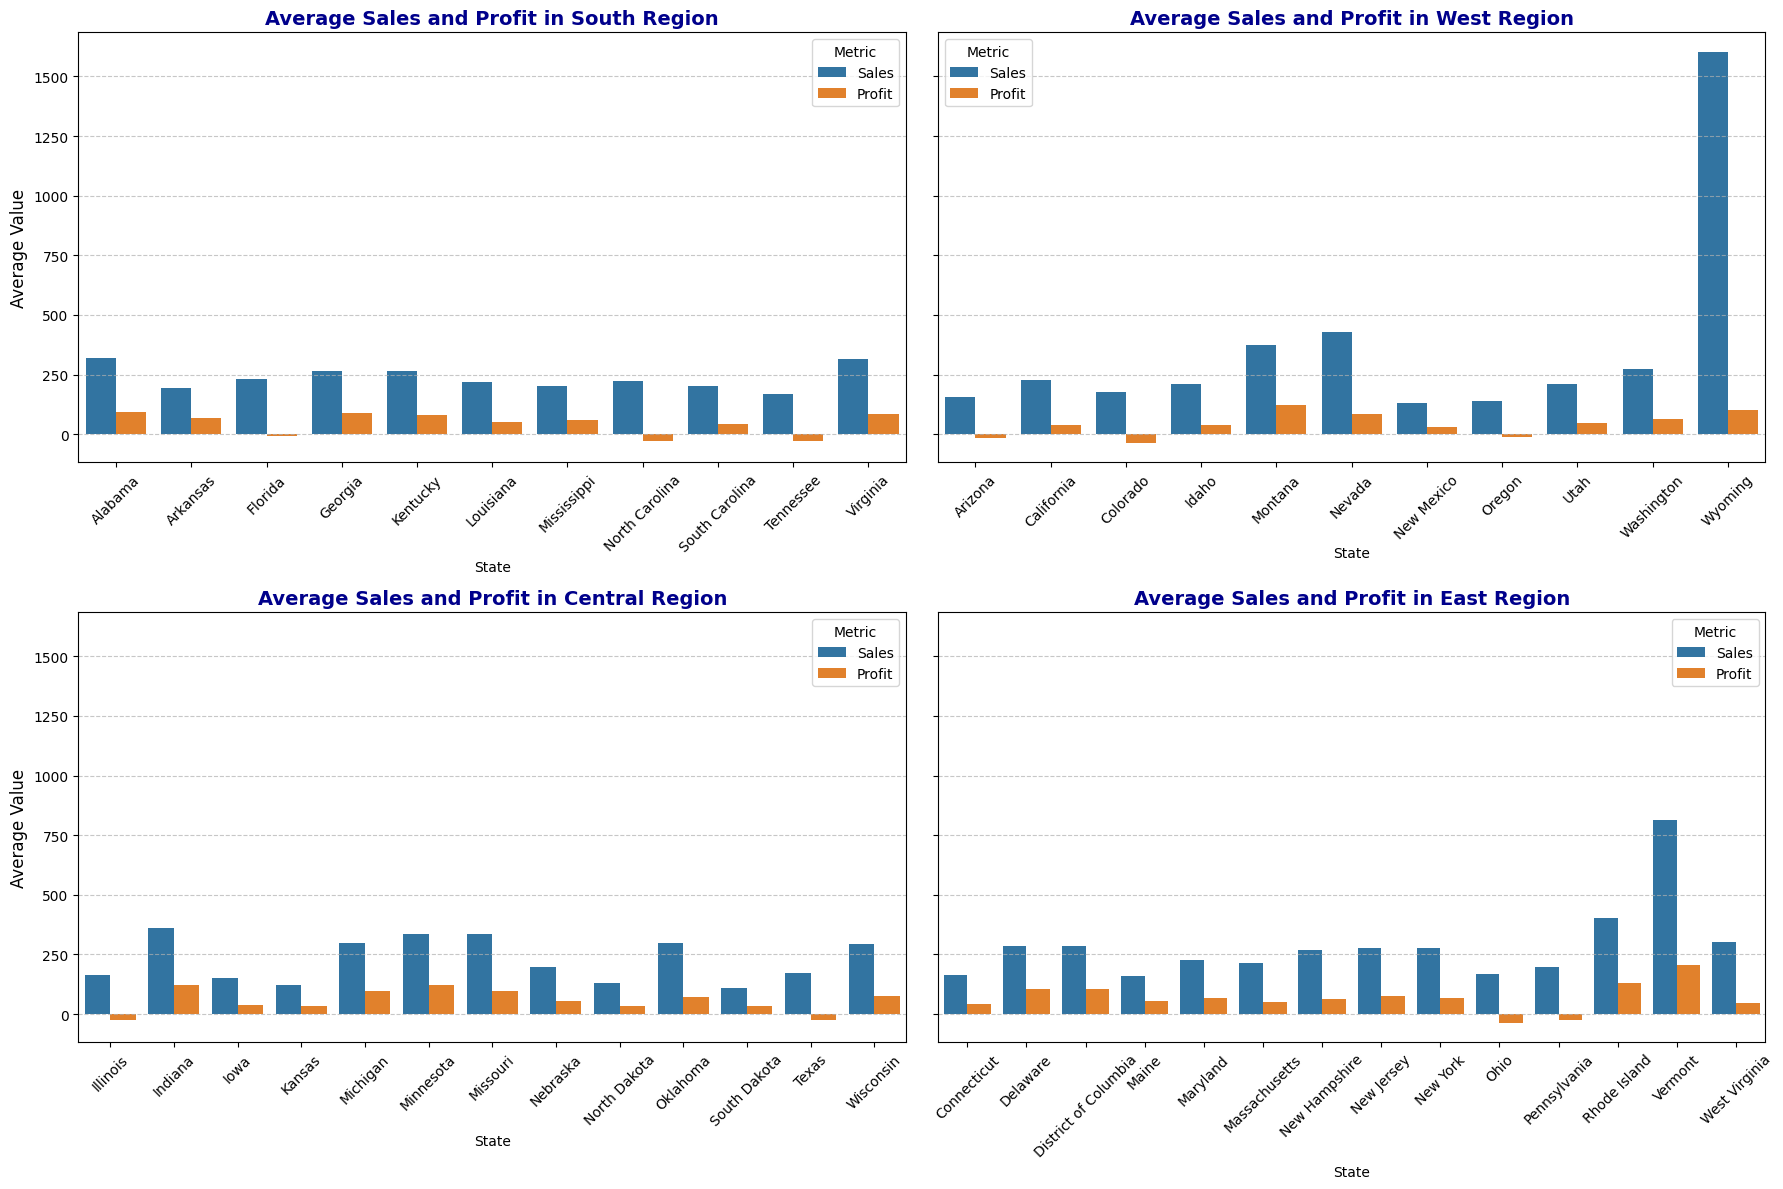

In [61]:
# Unique Regions
regions = df['Region'].unique()

# Define Custom Colors for Sales and Profit
custom_palette = {"Sales": "#1f77b4", "Profit": "#ff7f0e"}  

# Create Subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharey=True)
axes = axes.flatten()

# Iterate Over Regions
for i in range(len(regions)):
    df_region = df[df.Region == regions[i]].copy()
    
    # Group Data by State
    grouped_data = df_region.groupby(['State'])[['Sales', 'Profit']].mean().reset_index()
    
    # Bar Plot with Custom Colors
    sns.barplot(
        data=grouped_data.melt(id_vars='State', var_name='Metric', value_name='Value'),
        x='State', y='Value', hue='Metric', ax=axes[i], palette=custom_palette
    )

    # Titles and Labels
    axes[i].set_title(f"Average Sales and Profit in {regions[i]} Region", fontsize=14, fontweight='bold', color='darkblue')
    axes[i].set_ylabel("Average Value", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)
    axes[i].legend(title="Metric", fontsize=10)

    # Add Gridlines
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)

# Adjust Layout for Better Spacing
plt.tight_layout()
plt.show()


# City-wise Sales Distribution

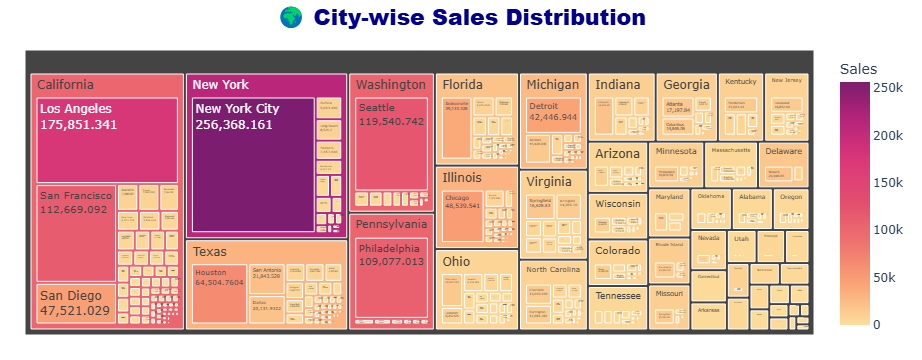

In [62]:
import plotly.express as px

# Group sales by State and City
temp = df[['State', 'City', 'Sales']].groupby(['State', 'City'])['Sales'].sum().reset_index()

# Create Treemap with Custom Colors
fig = px.treemap(
    temp,
    path=['State', 'City'],
    values='Sales',
    color='Sales',  
    color_continuous_scale='sunsetdark',  
)

# Update Layout for Better Visibility
fig.update_layout(
    height=900,
    title={
        'text': '🌍 City-wise Sales Distribution',  
        'x': 0.5,  # Centering the title
        'xanchor': 'center',
        'font': dict(size=22, color='darkblue', family='Arial Black')
    },
    margin=dict(t=50, l=25, r=25, b=25)  #
)

# Customize Text Display in the Treemap
fig.data[0].textinfo = 'label+text+value'

# Show Figure
fig.show()


# Above graph indicates->
Which city and state has how much sales->Size of a tile indicates corresponding sales

In [63]:
df_notime = df[['Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit']].copy()

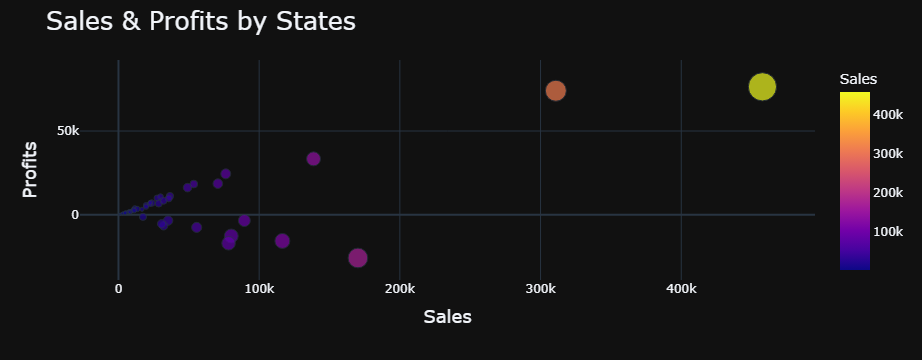

In [64]:
import plotly.express as px
import plotly.graph_objects as go

# Grouping data by 'State' and summing relevant columns
statewise_data = df_notime.groupby('State').sum().reset_index()

# Creating scatter plot
fig = px.scatter(
    statewise_data,
    x='Sales',
    y='Profit',
    hover_name='State',
    size='Quantity',
    color='Sales',  
)

# Updating layout for better appearance
fig.update_layout(
    title='Sales & Profits by States',
    title_font=dict(size=25),
    xaxis=dict(title='Sales', titlefont=dict(size=18)),
    yaxis=dict(title='Profits', titlefont=dict(size=18)),
    template="plotly_dark"  
)

fig.show()


# Discount Analysis

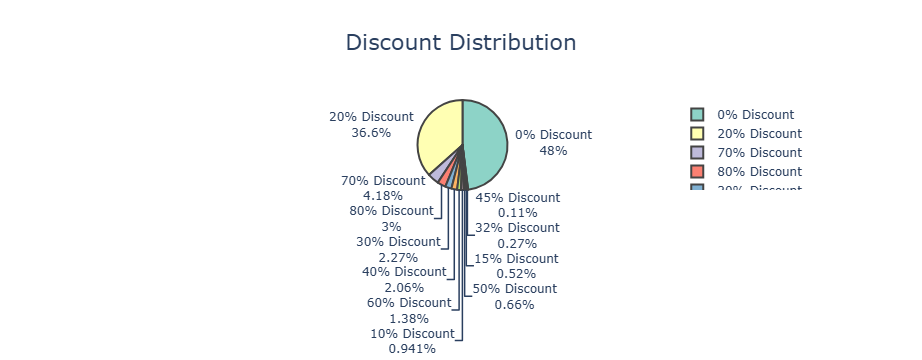

In [67]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import iplot

# Creating a dictionary to map unique discount values to labels
discount_mapping = {
    0.0: '0% Discount', 0.2: '20% Discount', 0.7: '70% Discount',
    0.8: '80% Discount', 0.3: '30% Discount', 0.4: '40% Discount',
    0.6: '60% Discount', 0.1: '10% Discount', 0.5: '50% Discount',
    0.15: '15% Discount', 0.32: '32% Discount', 0.45: '45% Discount'
}

# Mapping discounts in dataset to their respective labels
df_notime['Discount_Label'] = df_notime['Discount'].map(discount_mapping)

# Aggregating discount counts
discount_counts = df_notime['Discount_Label'].value_counts()

# Creating the Pie Chart
trace_pie = go.Pie(
    labels=discount_counts.index,
    values=discount_counts.values,
    textinfo='label+percent',
    hoverinfo='label+percent',
    marker=dict(colors=px.colors.qualitative.Set3, line=dict(width=2))
)

layout = go.Layout(
    title=dict(text='Discount Distribution', x=0.5, font=dict(size=22)),  # Title centered
    height=600
)

fig = go.Figure(data=[trace_pie], layout=layout)
fig.show()


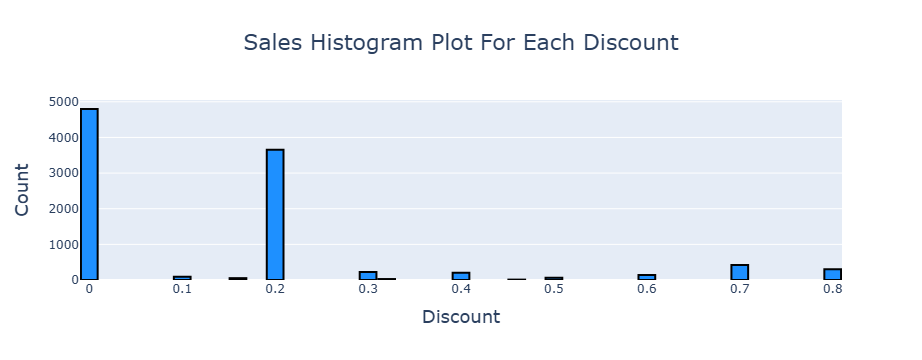

In [68]:
import plotly.graph_objects as go
from plotly.offline import iplot

# Creating Histogram
data = [go.Histogram(
    x=df_notime['Discount'],  # No need to sort
    marker=dict(color='dodgerblue', line=dict(width=2, color='black'))
)]

# Layout with Centered Title
layout = go.Layout(
    title=dict(text='Sales Histogram Plot For Each Discount', x=0.5, font=dict(size=22)),
    xaxis=dict(title='Discount', title_font=dict(size=18)),
    yaxis=dict(title='Count', title_font=dict(size=18)),
    bargap=0.1, 
    height=600
)

# Plot
fig = go.Figure(data=data, layout=layout)
fig.show()


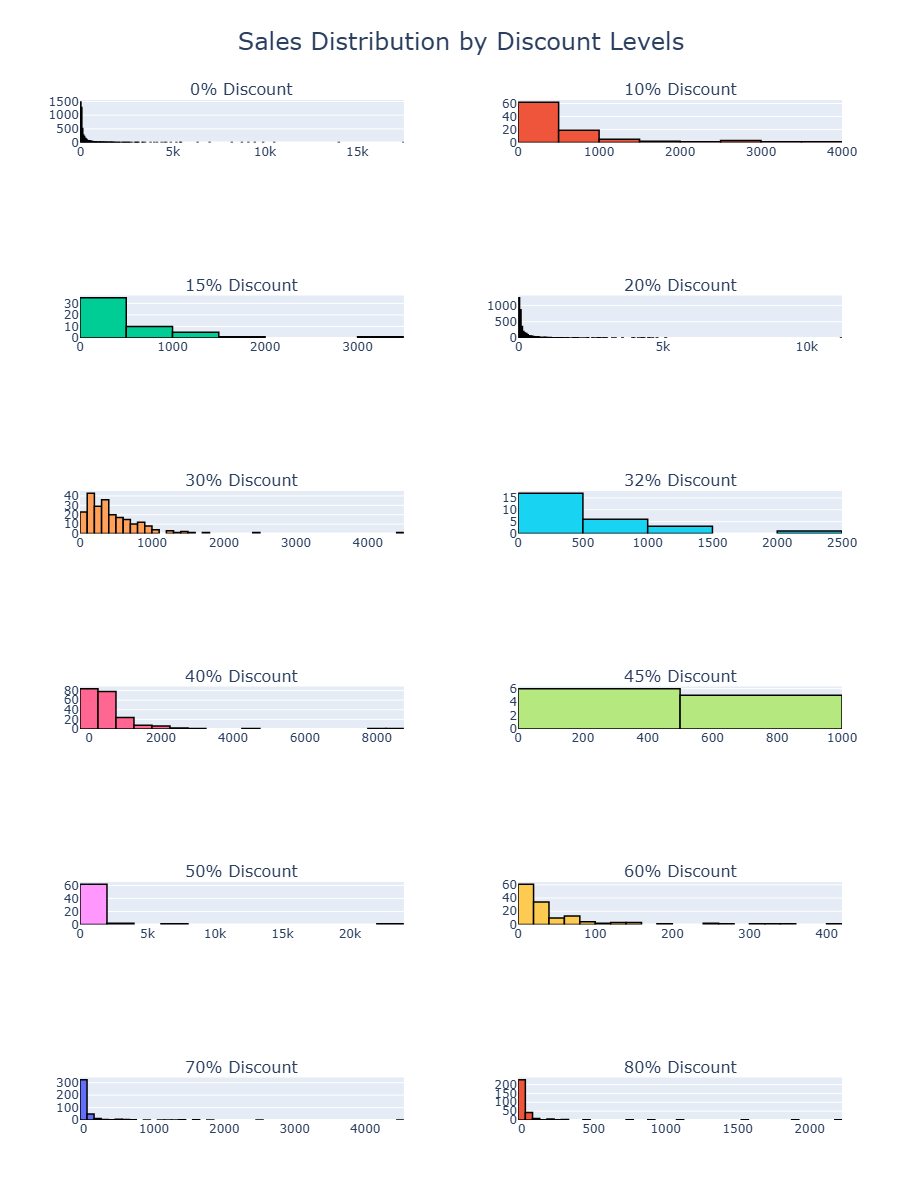

In [77]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define Subplot Titles
discount_levels = [0, 0.1, 0.15, 0.2, 0.3, 0.32, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8]
titles = [f'{int(d*100)}% Discount' for d in discount_levels]

# Create Subplots
fig = make_subplots(rows=6, cols=2, subplot_titles=titles, horizontal_spacing=0.15, vertical_spacing=0.15)

# Define Colors
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', 
          '#FF6692', '#B6E880', '#FF97FF', '#FECB52', '#636EFA', '#EF553B']

# Add Histograms
for i, discount in enumerate(discount_levels):
    row = (i // 2) + 1
    col = (i % 2) + 1
    fig.add_trace(go.Histogram(
        x=df_notime[df_notime['Discount'] == discount]['Sales'],
        name=f'{int(discount*100)}% Distribution',
        marker=dict(color=colors[i], line=dict(width=1.5, color='black'))
    ), row=row, col=col)

# Update Layout
fig.update_layout(
    width=1000,
    height=1200,
    title=dict(text='Sales Distribution by Discount Levels', x=0.5, font=dict(size=24)),
    showlegend=False
)

# Show Plot
fig.show()


In [80]:
!pip install squarify

# By applying the right policy on discounts, the loss of the store can be avoided in some sections.

Segmentation

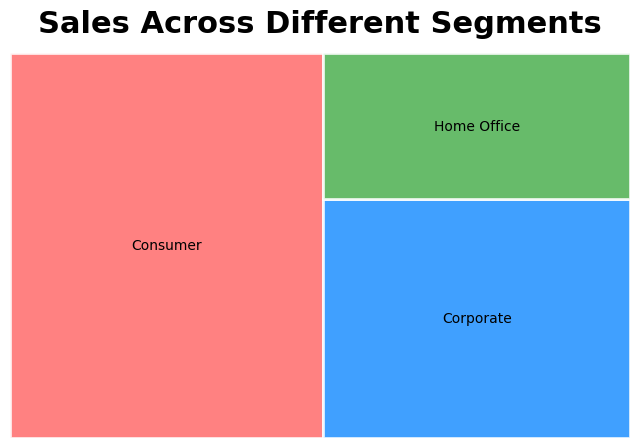

In [81]:
import squarify

# Prepare Data
df_tree = df[['Segment', 'Sales']].groupby(['Segment']).sum().reset_index()

# Define Colors for Better Visibility
colors = ['#FF6B6B', '#1E90FF', '#4CAF50']

# Plot Treemap
plt.figure(figsize=[8, 5])
squarify.plot(
    sizes=df_tree['Sales'], 
    label=df_tree['Segment'], 
    color=colors, 
    alpha=0.85, 
    edgecolor="white", 
    linewidth=2
)

# Title Styling
plt.title("Sales Across Different Segments", fontsize=22, fontweight='bold', pad=15, loc='center')

# Hide Axes for a Clean Look
plt.axis('off')

# Show Plot
plt.show()


# Sales Analysis by Segment

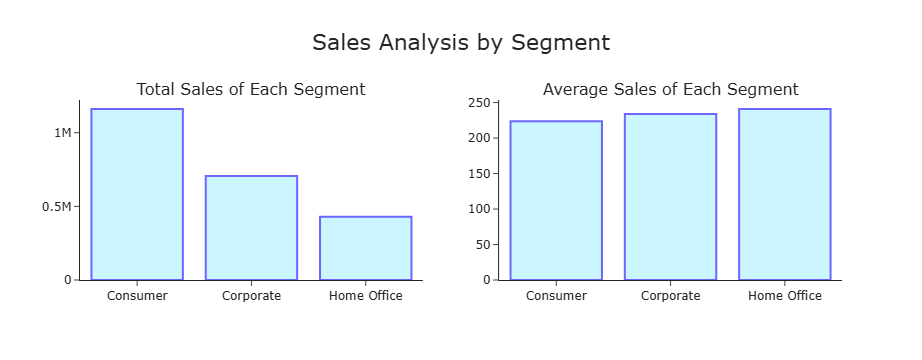

In [82]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Unique Segments
segments = df['Segment'].unique()

# Calculate Total & Average Sales for Each Segment
total_sales = [df[df['Segment'] == i]['Sales'].sum() for i in segments]
average_sales = [df[df['Segment'] == i]['Sales'].mean() for i in segments]

# Create Subplots
fig = make_subplots(
    rows=1, cols=2, 
    subplot_titles=['Total Sales of Each Segment', 'Average Sales of Each Segment']
)

# Add Total Sales Bar Chart
fig.add_trace(
    go.Bar(x=segments, y=total_sales,
           marker_color='rgb(171,241,255)',
           marker_line_color='rgb(12,0,335)',
           marker_line_width=2,
           opacity=0.6),
    row=1, col=1
)

# Add Average Sales Bar Chart
fig.add_trace(
    go.Bar(x=segments, y=average_sales,
           marker_color='rgb(171,241,255)',
           marker_line_color='rgb(12,0,335)',
           marker_line_width=2,
           opacity=0.6),
    row=1, col=2
)

# Update Layout (Centered Title)
fig.update_layout(
    template='simple_white',
    title=dict(
        text='Sales Analysis by Segment',
        font_size=22,
        x=0.5,  
        xanchor='center'
    ),
    showlegend=False
)

# Show Plot
fig.show()



# Profit Analysis by Segment

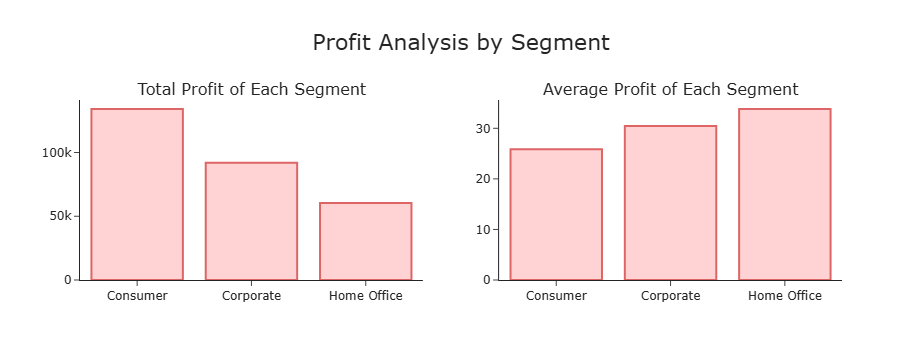

In [83]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Unique Segments
segments = df['Segment'].unique()

# Calculate Total & Average Profit for Each Segment
total_profit = [df[df['Segment'] == i]['Profit'].sum() for i in segments]
average_profit = [df[df['Segment'] == i]['Profit'].mean() for i in segments]

# Create Subplots
fig = make_subplots(
    rows=1, cols=2, 
    subplot_titles=['Total Profit of Each Segment', 'Average Profit of Each Segment']
)

# Add Total Profit Bar Chart
fig.add_trace(
    go.Bar(x=segments, y=total_profit,
           marker_color='rgb(255,183,183)',
           marker_line_color='rgb(200,0,0)',
           marker_line_width=2,
           opacity=0.6),
    row=1, col=1
)

# Add Average Profit Bar Chart
fig.add_trace(
    go.Bar(x=segments, y=average_profit,
           marker_color='rgb(255,183,183)',
           marker_line_color='rgb(200,0,0)',
           marker_line_width=2,
           opacity=0.6),
    row=1, col=2
)

# Update Layout (Centered Title)
fig.update_layout(
    template='simple_white',
    title=dict(
        text='Profit Analysis by Segment',
        font_size=22,
        x=0.5,  # Centers the title
        xanchor='center'
    ),
    showlegend=False
)

# Show Plot
fig.show()


# Sales vs Profit Across Different Customer Segments

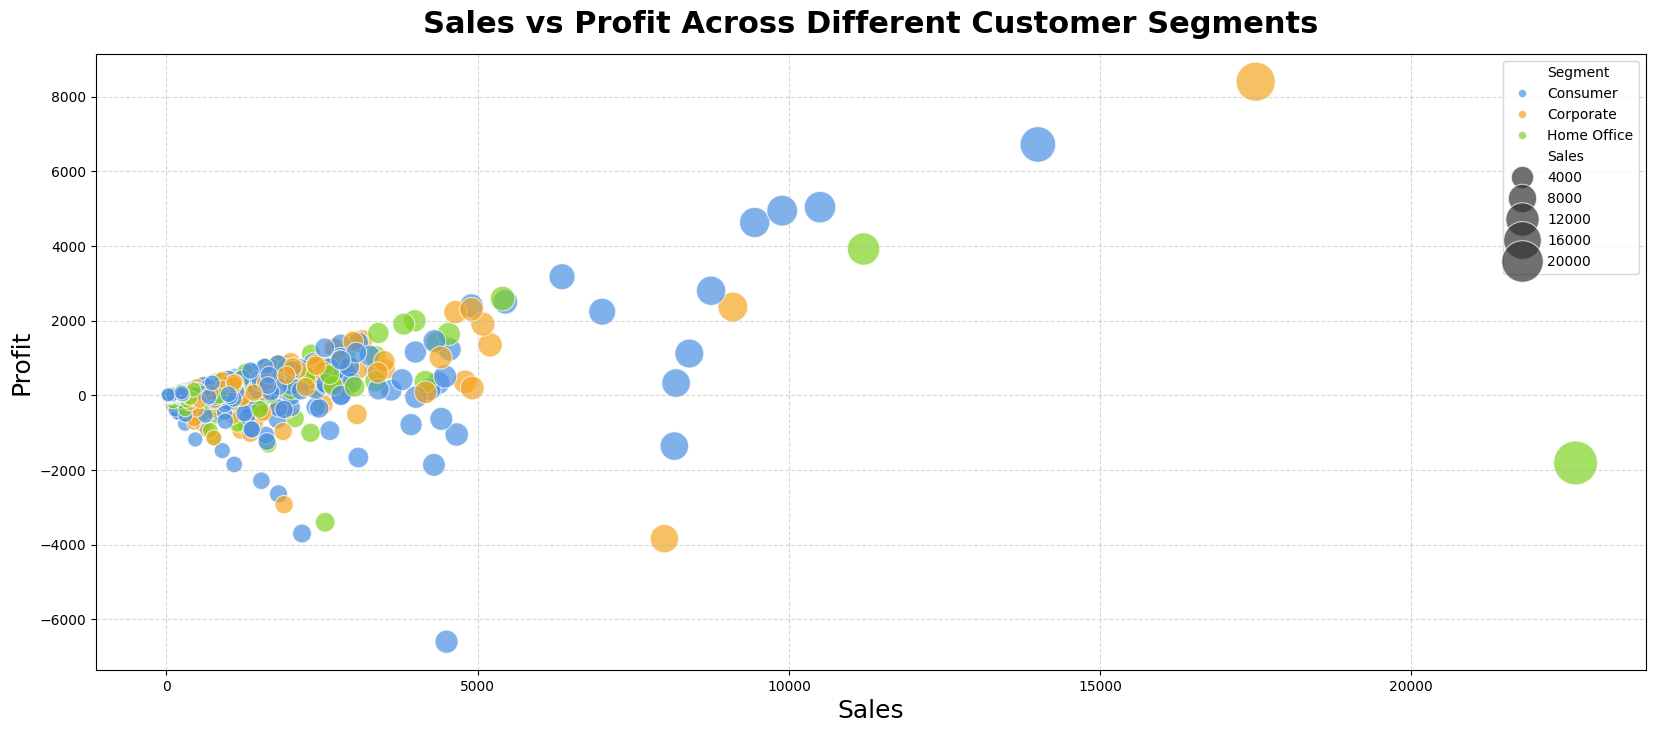

In [85]:
# Create a copy of relevant data
df_scatter = df[['Sales', 'Profit', 'Segment']].copy()

# Set figure size
plt.figure(figsize=[20, 8])

# Scatter Plot with Enhanced Styling
sns.scatterplot(
    x=df_scatter['Sales'], 
    y=df_scatter['Profit'], 
    hue=df_scatter['Segment'], 
    palette=['#4A90E2', '#F5A623', '#7ED321'], 
    size=df_scatter["Sales"], 
    sizes=(100, 1000), 
    alpha=0.7,  
    legend='auto'
)

# Centered Title with Improved Styling
plt.title(
    "Sales vs Profit Across Different Customer Segments", 
    fontsize=22, 
    fontweight='bold', 
    pad=15, 
    loc='center'
)

# Axis Labels
plt.xlabel("Sales", fontsize=18)
plt.ylabel("Profit", fontsize=18)

# Grid for Better Readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show Plot
plt.show()


# Sales:
While the Consumer segment contributes to the highest total sales, the Home Office segment generates higher average sales per transaction. 
This suggests that consumers are more frequent buyers but tend to make smaller purchases, whereas home office customers, though fewer in number, make larger purchases on average.

Profitability:
imilarly, the Consumer segment has the highest total profit, but the Home Office segment achieves greater average profit per transaction. 
This indicates that the products or services sold to home office customers are more profitable on average.

Analyze the Orders & Sales

In [89]:
import pandas as pd

# Ensure 'Order Date' is in datetime format with dayfirst=True
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')

# Check for any NaT (invalid dates)
invalid_dates = df[df['Order Date'].isna()]
if not invalid_dates.empty:
    print("⚠️ Warning: Some dates could not be converted:")
    print(invalid_dates)

# Create a copy of the required columns
df_time = df[['Order Date', 'Segment', 'Sales', 'Quantity', 'Discount', 'Profit']].copy()

# Extract Month and Year from Order Date
df_time['Month'] = df_time['Order Date'].dt.month
df_time['Year'] = df_time['Order Date'].dt.year

# Display the first few rows
df_time.head()


,Order Date,Segment,Sales,Quantity,Discount,Profit,Month,Year
0,2013-11-09,Consumer,261.9600,2,0.00,41.9136,11,2013
1,2013-11-09,Consumer,731.9400,3,0.00,219.5820,11,2013
2,2013-06-13,Corporate,14.6200,2,0.00,6.8714,6,2013
3,2012-10-11,Consumer,957.5775,5,0.45,-383.0310,10,2012
4,2012-10-11,Consumer,22.3680,2,0.20,2.5164,10,2012


# Average Sales and Profit over Time Period (2014-2018)

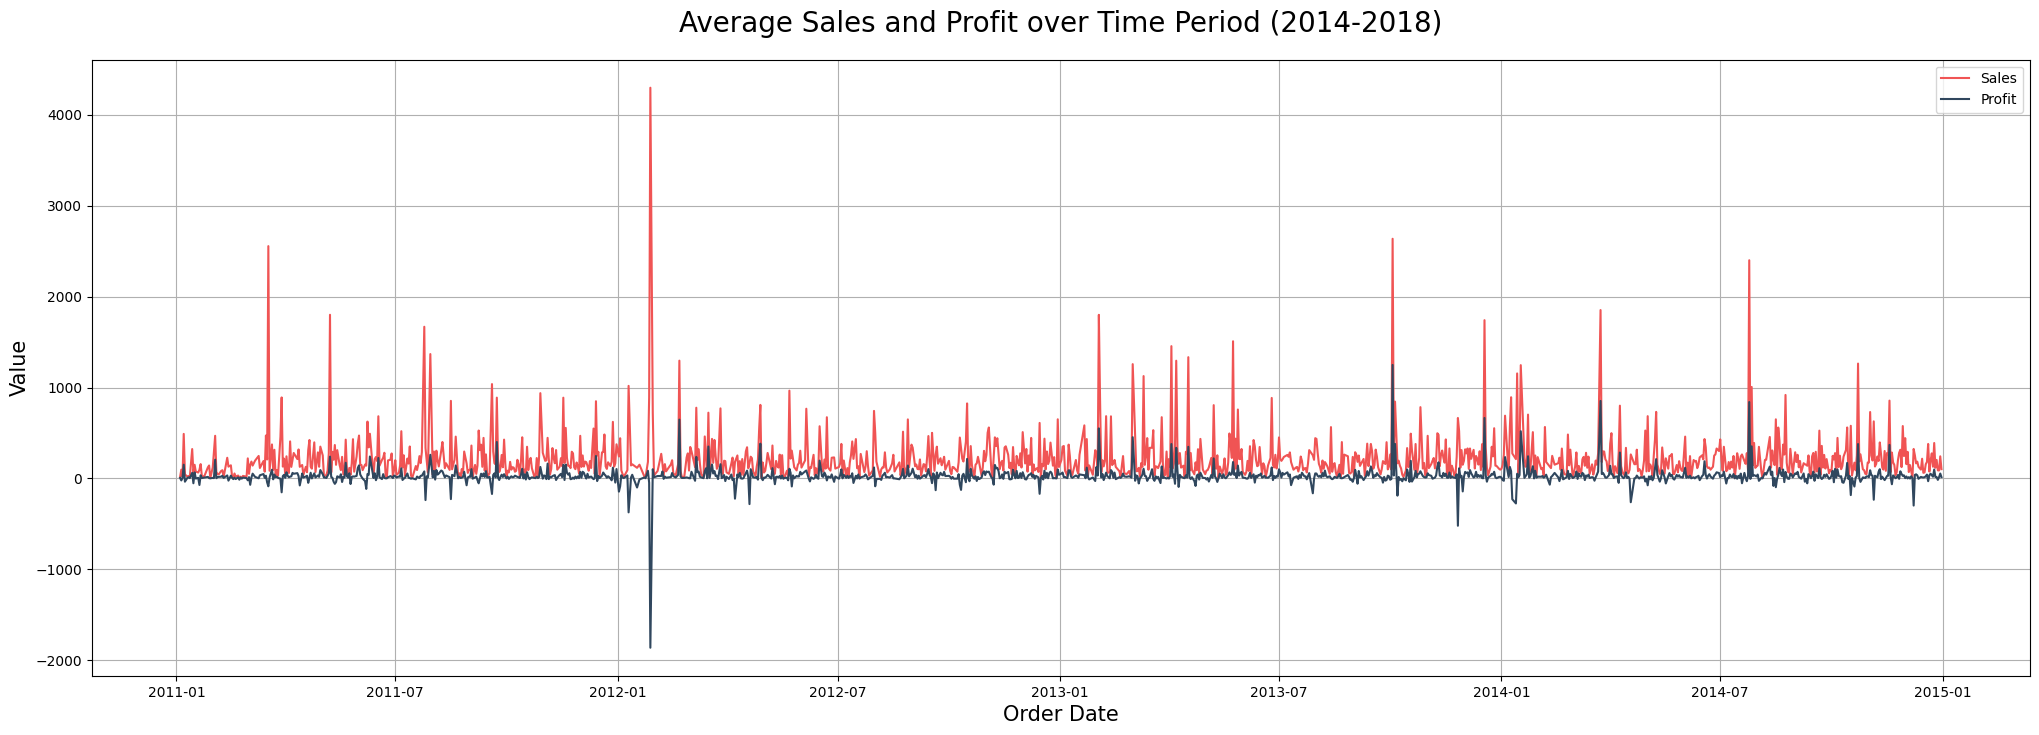

In [90]:
# Sorting and grouping the data
df_line = df_time[['Order Date', 'Sales', 'Profit']].sort_values('Order Date')
df_line['Order Date'] = pd.to_datetime(df_line['Order Date'])
df_line = df_line.groupby('Order Date').mean()

# Plotting
plt.figure(figsize=[25, 8])
plt.plot(df_line.index, df_line['Sales'], color='#F05454', label="Sales")
plt.plot(df_line.index, df_line['Profit'], color='#30475E', label="Profit")

# Formatting
plt.title("Average Sales and Profit over Time Period (2014-2018)", size=20, pad=20)
plt.xlabel("Order Date", size=15)
plt.ylabel("Value", size=15)
plt.legend()
plt.grid(True)

# Show plot
plt.show()


# Monthly Sales by Year with Average Line

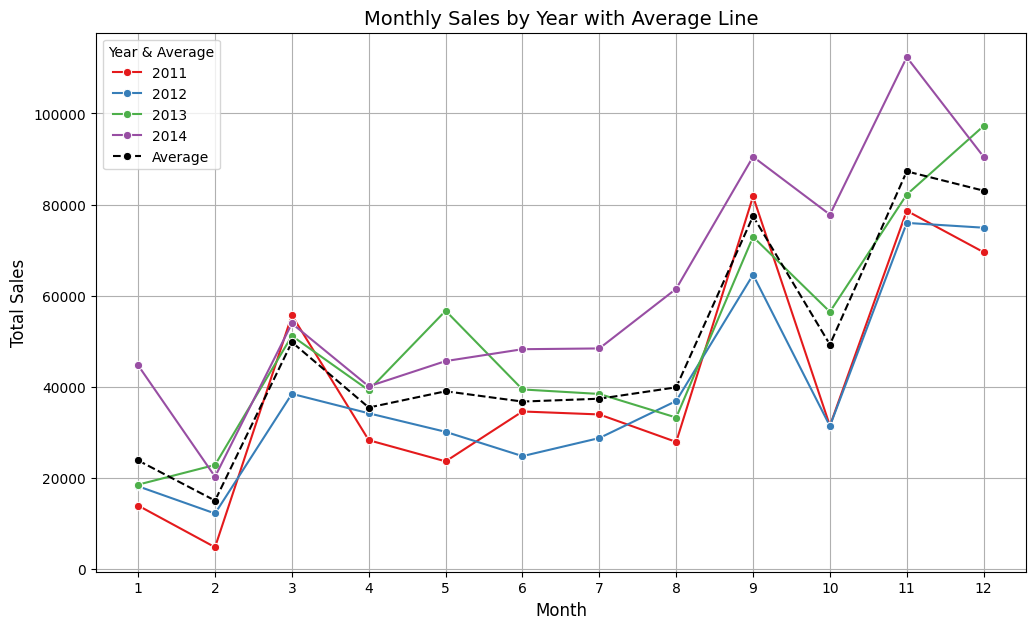

In [91]:
# Grouping data
monthly_sales = df_time.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
avg_monthly_sales = monthly_sales.groupby('Month')['Sales'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 7))

# Line plot for sales by year
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year', marker='o', palette='Set1')

# Line plot for average monthly sales
sns.lineplot(data=avg_monthly_sales, x='Month', y='Sales', color='black', linestyle='--', marker='o', label='Average')

# Formatting
plt.title('Monthly Sales by Year with Average Line', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(title='Year & Average')

# Show plot
plt.show()


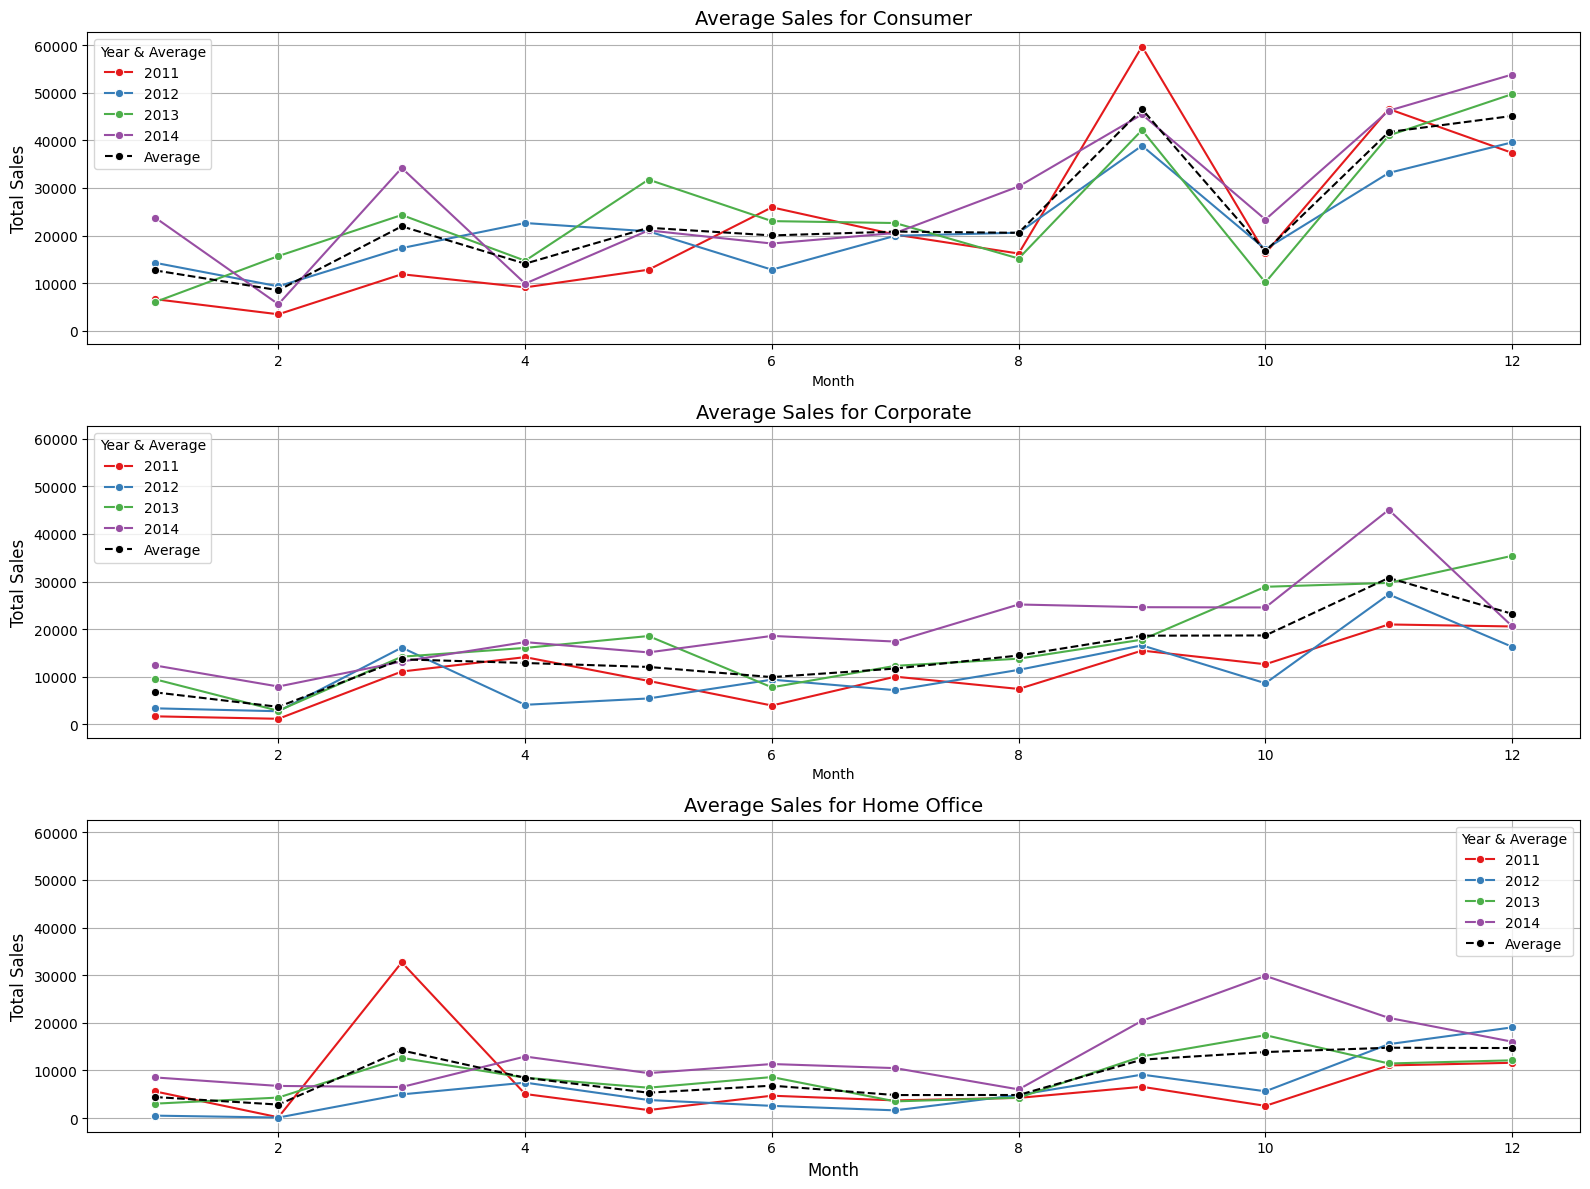

In [92]:
# Ensure segments exist
segments = df_time['Segment'].unique()

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharey=True)

# Loop through each segment
for i, segment in enumerate(segments):
    # Filter data for the specific segment
    monthly_sales = df_time[df_time['Segment'] == segment].groupby(['Year', 'Month'])['Sales'].sum().reset_index()
    avg_monthly_sales = monthly_sales.groupby('Month')['Sales'].mean().reset_index()

    # Plot sales trend for each year
    sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year', marker='o', palette='Set1', ax=axes[i])

    # Plot average monthly sales
    sns.lineplot(data=avg_monthly_sales, x='Month', y='Sales', color='black', linestyle='--', marker='o', label='Average', ax=axes[i])

    # Formatting
    axes[i].set_title(f'Average Sales for {segment}', fontsize=14)
    axes[i].set_ylabel('Total Sales', fontsize=12)
    axes[i].grid(True)

    # Adjust legend for each subplot
    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(handles=handles, labels=labels, title='Year & Average')

# Improve layout
plt.xlabel("Month", fontsize=12)
plt.tight_layout()
plt.show()


# In the store's sales data, customer purchases show a significant upward trend during specific months, namely March (3), September (9), November (11), and December (12). This pattern suggests seasonality, potentially influenced by holidays, promotions, or year-end activities. Conversely, there is a noticeable decline in purchases during January (1), February (2), and October (10), possibly due to post-holiday slowdowns or other factors like reduced promotional activities.On the other hand, purchases in the Home Office and Corporate segments are relatively consistent throughout the year, reflecting steady operational or business-driven demand. However, these segments also show a slight dip in January, likely due to slower business activities at the start of the year.